# RV Fitting Project
May 16, 2022

Gurman Sachdeva

1007896314

## 1. Using $\texttt{REBOUND}$

In [1]:
import rebound
import matplotlib.pyplot as plt
import numpy as np

In [2]:
sim = rebound.Simulation()
sim.units = ('yr', 'AU', 'Msun')

In [3]:
sim.add(m=1.)  # Central star of mass m = Msun
sim.add(m=1e-3, a=5.2, e=0.05)  # First planet, p1
sim.add(m=3e-4, a=9.6, e=0.05)  # Second planet, p2

In [4]:
num_timesteps = 10000
num_years = 500
times = np.linspace(0, num_years, num_timesteps)  # timesteps of 0.05 yr over 500 yr

# Creating the lists of arrays which will store the three position 
# coordinates of both planets for the above time range

p1_x = np.empty(num_timesteps)
p1_y = np.empty(num_timesteps)
p1_axis = np.empty(num_timesteps)
p1_ecc = np.empty(num_timesteps)
p1_data = [p1_x, p1_y, p1_axis, p1_ecc]

p2_x = np.empty(num_timesteps)
p2_y = np.empty(num_timesteps)
p2_axis = np.empty(num_timesteps)
p2_ecc = np.empty(num_timesteps)
p2_data = [p2_x, p2_y, p2_axis, p2_ecc]

planet_data = [p1_data, p2_data]

for timestep in range(num_timesteps):  # looping over number of timesteps
    sim.integrate((timestep * num_years) / num_timesteps)
    for i in range(len(planet_data)):  
        planet_data[i][0][timestep] = sim.particles[i+1].x
        planet_data[i][1][timestep] = sim.particles[i+1].y
        planet_data[i][2][timestep] = sim.particles[i+1].a
        planet_data[i][3][timestep] = sim.particles[i+1].e

body_names = ['Planet 1', 'Planet 2']
body_colours = ['#d3d3d3', '#273aa9']

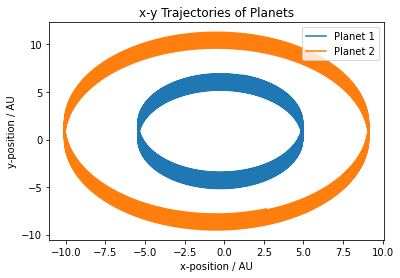

In [5]:
plt.figure()
for i in range(len(planet_data)):
    plt.plot(planet_data[i][0], planet_data[i][1], label=f'Planet {i+1}')
plt.legend(loc='upper right')
plt.xlabel('x-position / AU')
plt.ylabel('y-position / AU')
plt.title('x-y Trajectories of Planets')
plt.savefig("q1f1.pdf")

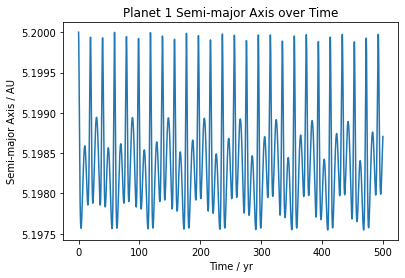

In [6]:
plt.figure()
plt.plot(times, planet_data[0][2])
plt.xlabel('Time / yr')
plt.ylabel('Semi-major Axis / AU')
plt.title('Planet 1 Semi-major Axis over Time')
plt.savefig("q1f2.pdf")

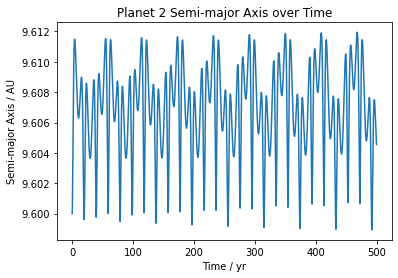

In [7]:
plt.figure()
plt.plot(times, planet_data[1][2])
plt.xlabel('Time / yr')
plt.ylabel('Semi-major Axis / AU')
plt.title('Planet 2 Semi-major Axis over Time')
plt.savefig("q1f3.pdf")

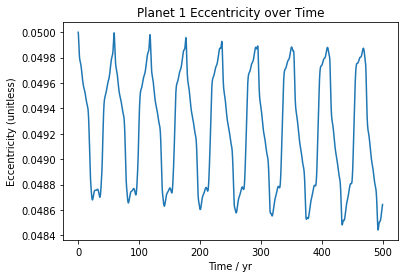

In [8]:
plt.figure()
plt.plot(times, planet_data[0][3])
plt.xlabel('Time / yr')
plt.ylabel('Eccentricity (unitless)')
plt.title('Planet 1 Eccentricity over Time')
plt.savefig("q1f4.pdf")

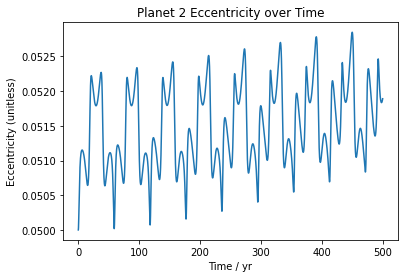

In [9]:
plt.figure()
plt.plot(times, planet_data[1][3])
plt.xlabel('Time / yr')
plt.ylabel('Eccentricity (unitless)')
plt.title('Planet 2 Eccentricity over Time')
plt.savefig("q1f5.pdf")

## 2. Making a Synthetic RV Curve and Understanding RV

In [10]:
from typing import Tuple

In [11]:
total_orbits = 30  # Total orbits to be completed during each simulation

In [12]:
# We define a function because this makes step 3 easier:
def q2_simulate(star_mass=0.1, planet_mass=3e-5, planet_axis=0.1, planet_ecc=0) -> Tuple[np.array, np.array]:
    sim = rebound.Simulation()
    sim.units = ('yr', 'AU', 'Msun')
    sim.add(m=star_mass)  # Central star
    sim.add(m=planet_mass, a=planet_axis, e=planet_ecc)  # Planet
    
    # The orbital period of the planet will be constant since this is a binary system. 
    # Thus we can use calculate_orbit to determine its period, then run the 
    # simulation for 30 periods accordingly. 
    period = (sim.particles[1].calculate_orbit(primary=sim.particles[0])).P
    num_timesteps = 6000  # Such that each orbit will have 200 data points

    times = np.linspace(0, total_orbits * period, num_timesteps)
    
    star_x = np.empty(num_timesteps)
    star_y = np.empty(num_timesteps)

    for timestep in range(num_timesteps):  # add 1 because range excludes endpoint
        sim.integrate((timestep * total_orbits * period) / num_timesteps)
        star_x[timestep] = sim.particles[0].x
        star_y[timestep] = sim.particles[0].y
    
    star_vx = np.empty(num_timesteps - 1)  # since pointwise vx given by average of two x / interval
    interval = (total_orbits * period) / num_timesteps
    for i in range(num_timesteps - 1):
        star_vx[i] = (star_x[i+1] - star_x[i]) / interval
        
    return times, star_vx

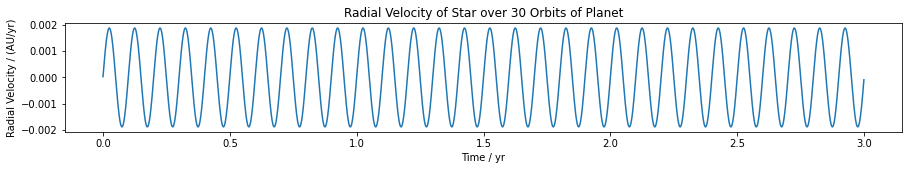

<Figure size 432x288 with 0 Axes>

In [13]:
times, star_vx = q2_simulate()
plt.figure(figsize=(15, 2))
plt.plot(times[:-1], star_vx)
plt.xlabel("Time / yr")
plt.ylabel("Radial Velocity / (AU/yr)")
plt.title("Radial Velocity of Star over 30 Orbits of Planet")
plt.show()
plt.savefig("q2f1.pdf")

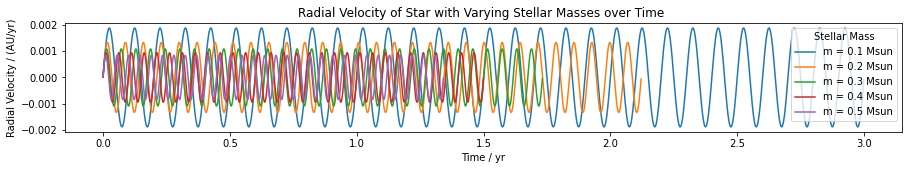

<Figure size 432x288 with 0 Axes>

In [14]:
# First create a range of star masses for each of which the simulation will be rerun
min_mass = 0.1
max_mass = 0.5
interval = 0.1
star_masses = np.arange(min_mass, max_mass + interval, interval)

plt.figure(figsize=(15, 2))

# Add a plot for each mass to the same figure
for mass in star_masses:
    times, star_vx = q2_simulate(star_mass=mass)
    plt.plot(times[:-1], star_vx, label=("m = " + str(round(mass, 1)) + " Msun"))

plt.legend(loc="upper right", title="Stellar Mass")
plt.xlabel("Time / yr")
plt.ylabel("Radial Velocity / (AU/yr)")
plt.title("Radial Velocity of Star with Varying Stellar Masses over Time ")
plt.show() 
plt.savefig("q2f2.pdf")

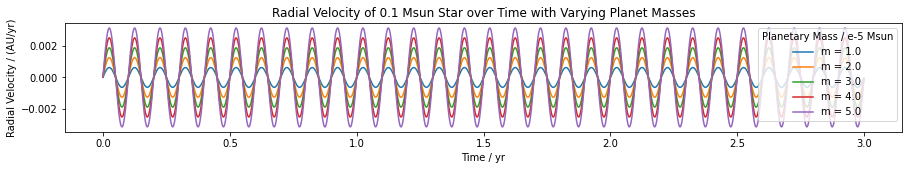

<Figure size 432x288 with 0 Axes>

In [15]:
# Now we vary the mass of the planet using the same strategy
# Note by the definition of the simulation function, the mass of the star 
# remains fixed at 0.1 Msun
min_mass = 1e-5
max_mass = 5e-5
interval = 1e-5
planet_masses = np.arange(min_mass, max_mass + interval, interval)

plt.figure(figsize=(15, 2))

# Add a plot for each mass to the same figure
for mass in planet_masses:
    times, star_vx = q2_simulate(planet_mass=mass)
    plt.plot(times[:-1], star_vx, label=("m = " + str(round(1e5 * mass, 1))))

plt.legend(loc="upper right", title="Planetary Mass / e-5 Msun")
plt.xlabel("Time / yr")
plt.ylabel("Radial Velocity / (AU/yr)")
plt.title("Radial Velocity of 0.1 Msun Star over Time with Varying Planet Masses")
plt.show() 
plt.savefig("q2f3.pdf")

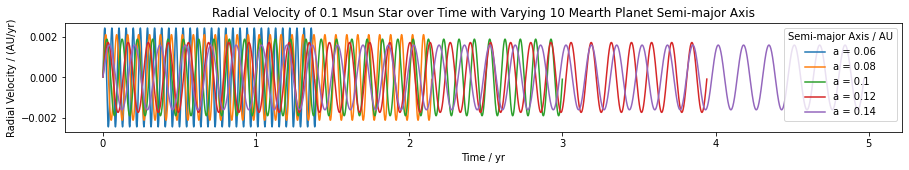

<Figure size 432x288 with 0 Axes>

In [16]:
# Now we vary the semi-major axis of the planet
min_axis = 0.06
max_axis = 0.14
interval = 0.02
planet_axes = np.arange(min_axis, max_axis + interval, interval)

plt.figure(figsize=(15, 2))

# Add a plot for each mass to the same figure
for axis in planet_axes:
    times, star_vx = q2_simulate(planet_axis=axis)
    plt.plot(times[:-1], star_vx, label=("a = " + str(round(axis, 2))))

plt.legend(loc="upper right", title="Semi-major Axis / AU")
plt.xlabel("Time / yr")
plt.ylabel("Radial Velocity / (AU/yr)")
plt.title("Radial Velocity of 0.1 Msun Star over Time with Varying 10 Mearth Planet Semi-major Axis")
plt.show() 
plt.savefig("q2f4.pdf")

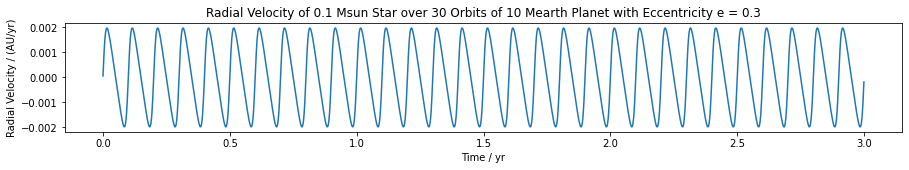

<Figure size 432x288 with 0 Axes>

In [17]:
times, star_vx = q2_simulate(planet_ecc = 0.3)
plt.figure(figsize=(15, 2))
plt.plot(times[:-1], star_vx)
plt.xlabel("Time / yr")
plt.ylabel("Radial Velocity / (AU/yr)")
plt.title("Radial Velocity of 0.1 Msun Star over 30 Orbits of 10 Mearth Planet with Eccentricity e = 0.3")
plt.show()
plt.savefig("q2f5.pdf")

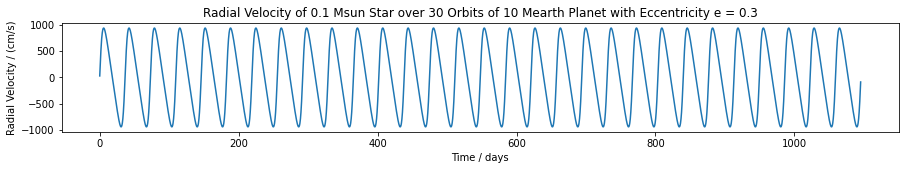

<Figure size 432x288 with 0 Axes>

In [18]:
times, star_vx = q2_simulate(planet_ecc = 0.3)
plt.figure(figsize=(15, 2))
plt.plot(times[:-1] * 365.25, star_vx * (1.496e+13 * 3.17098e-8))
plt.xlabel("Time / days")
plt.ylabel("Radial Velocity / (cm/s)")
plt.title("Radial Velocity of 0.1 Msun Star over 30 Orbits of 10 Mearth Planet with Eccentricity e = 0.3")
plt.show()
plt.savefig("q2f6.pdf")

## 3. Fitting RV Data Using $\texttt{REBOUND}$ and $\texttt{emcee}$

### 3.1 Reading the Data

In [19]:
data = open("data.txt", 'r')

In [20]:
for i in range(6):
    temp = data.readline()

In [21]:
num_lines = 122
days = np.empty(num_lines)
rv = np.empty(num_lines)
error = np.empty(num_lines)

counter = 0
for line in data:
    entries = line.split()
    days[counter], rv[counter], error[counter] = entries[0], entries[1], entries[2]
    counter += 1
    
data.close()

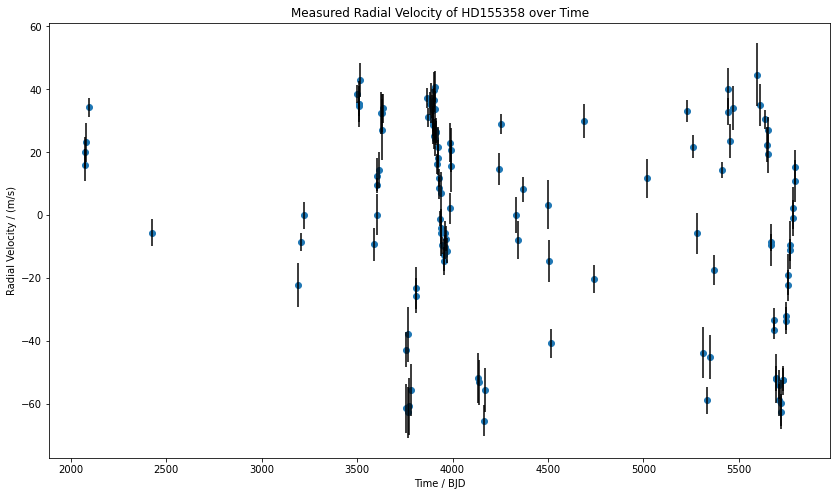

<Figure size 432x288 with 0 Axes>

In [22]:
plt.figure(figsize=(14, 8))
plt.scatter(days, rv)
plt.errorbar(days, rv, yerr=error, fmt='none', color='black')
plt.xlabel("Time / BJD")
plt.ylabel("Radial Velocity / (m/s)")
plt.title("Measured Radial Velocity of HD155358 over Time")
plt.show()
plt.savefig("q3f1.pdf")

### 3.2 Testing Synthetic RV

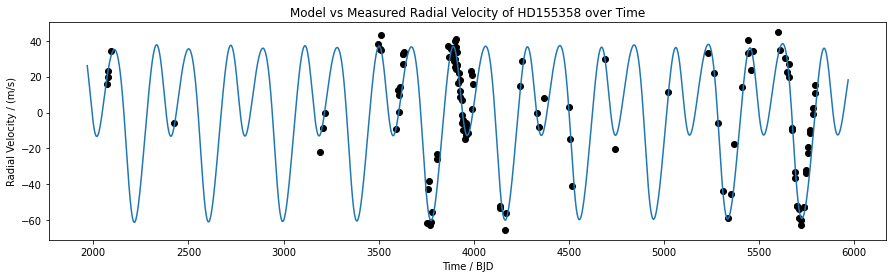

<Figure size 432x288 with 0 Axes>

In [23]:
sim = rebound.Simulation()
sim.units = ('yr', 'AU', 'Msun')
sim.add(m=0.92)  # Central star
sim.add(m=0.92 / 1047, a=0.641, e=0.17)  # Planet 1
sim.add(m=0.85 / 1047, a=1.017, e=0.10)  # Planet 1

start_date = 15000
num_timesteps = 25000
times = np.linspace(start_date / 365.25, num_timesteps / 365.25, num_timesteps - start_date)

star_x = np.empty(num_timesteps - start_date)
star_y = np.empty(num_timesteps - start_date)

for timestep in range(start_date, num_timesteps):
    sim.integrate(timestep / 365.25)
    star_x[timestep - start_date] = sim.particles[0].x
    star_y[timestep - start_date] = sim.particles[0].y

star_vx = np.empty(num_timesteps - 1 - start_date)
for i in range(num_timesteps - 1 - start_date):
    star_vx[i] = (star_x[i+1] - star_x[i]) / (1/365.25)

# The below were determined through trial and error, and are not related to the accuracy 
# of the model since only the period with which the RV changes is significant
cutoff = 3800  # Slightly before the first day, in the current times array, where the 
               # experimental data has a data point
day_range = 4000  # The approximate number of days from the cutoff date after which there are
             # no more data points
offset = 16832  # The offset of the simulation time from the time in the given data
    
plt.figure(figsize=(15, 4))
plt.plot((times[cutoff:cutoff + day_range] * 365.25) - offset, 
         star_vx[cutoff:cutoff + day_range] * (1.496e+11 * 3.17098e-8))
plt.scatter(days, rv, c='black')
plt.xlabel("Time / BJD")
plt.ylabel("Radial Velocity / (m/s)")
plt.title("Model vs Measured Radial Velocity of HD155358 over Time")
plt.show()
plt.savefig("q3f2.pdf")

### 3.3 Learning About $\texttt{emcee}$

# :(